# LOADING USEFUL MODULES(LIBRARIES) FOR THIS WORK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
%matplotlib inline

# LOADING THE DATASET

In [2]:
df=pd.read_csv(r"C:\Users\pcd\Desktop\ZT_prediction\dataset\ZT_filtered.csv")

# DATA EXPLORATION

In [3]:
df.head()

,Formula,temperature,seebeck_coefficient,electrical_conductivity,thermal_conductivity,power_factor,ZT
0,Ag0.15Sb0.15Te1.15Ge0.85,300,79,1440.0,1.499,0.000891,0.18
1,Ag0.15Sb0.15Te1.15Ge0.85,400,122,1180.0,1.531,0.001760,0.46
2,Ag0.15Sb0.15Te1.15Ge0.85,700,199,824.0,1.651,0.003260,1.38
3,Ag1.0Cr1.0Se2.0,300,279,22.4,0.956,0.000175,0.05
4,Ag1.0Cr1.0Se2.0,400,300,24.9,0.400,0.000224,0.22


In [4]:
df.tail()


,Formula,temperature,seebeck_coefficient,electrical_conductivity,thermal_conductivity,power_factor,ZT
82,Tl9.0Bi1.0Te6.0,300,256,156.0,0.481,0.001020,0.64
83,Tl9.0Bi1.0Te6.0,400,338,89.5,0.409,0.001020,1.00
84,Bi1.2S4.0Ti2.0,300,-41,3090.0,2.940,0.000526,0.05
85,Bi1.2S4.0Ti2.0,400,-55,2000.0,2.410,0.000603,0.10
86,Bi1.2S4.0Ti2.0,700,-89,1050.0,2.110,0.000838,0.28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Formula                  87 non-null     object 
 1   temperature              87 non-null     int64  
 2   seebeck_coefficient      87 non-null     int64  
 3   electrical_conductivity  87 non-null     float64
 4   thermal_conductivity     87 non-null     float64
 5   power_factor             87 non-null     float64
 6   ZT                       87 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 4.9+ KB


In [6]:
df.describe()

,temperature,seebeck_coefficient,electrical_conductivity,thermal_conductivity,power_factor,ZT
count,87.000000,87.000000,87.000000,87.000000,8.700000e+01,87.000000
mean,444.827586,86.655172,1104.949870,2.168460,1.035483e-03,0.353180
std,168.273463,139.770063,1173.160874,1.428455,1.141475e-03,0.465084
min,300.000000,-196.000000,0.007690,0.200000,9.160000e-08,0.000073
25%,300.000000,-41.000000,260.000000,1.268000,2.790000e-04,0.050000
50%,400.000000,79.000000,1000.000000,1.980000,6.750000e-04,0.150000
75%,700.000000,201.000000,1545.000000,2.746500,1.255000e-03,0.390000
max,700.000000,388.000000,8200.000000,9.070000,6.730000e-03,1.600000


In [7]:
df.corr()

,temperature,seebeck_coefficient,electrical_conductivity,thermal_conductivity,power_factor,ZT
temperature,1.000000,0.129355,-0.311120,-0.276263,0.158602,0.619965
seebeck_coefficient,0.129355,1.000000,-0.273649,-0.236971,0.211866,0.545213
electrical_conductivity,-0.311120,-0.273649,1.000000,0.435862,0.226762,-0.244523
thermal_conductivity,-0.276263,-0.236971,0.435862,1.000000,-0.008790,-0.418000
power_factor,0.158602,0.211866,0.226762,-0.008790,1.000000,0.620741
ZT,0.619965,0.545213,-0.244523,-0.418000,0.620741,1.000000


<AxesSubplot:>

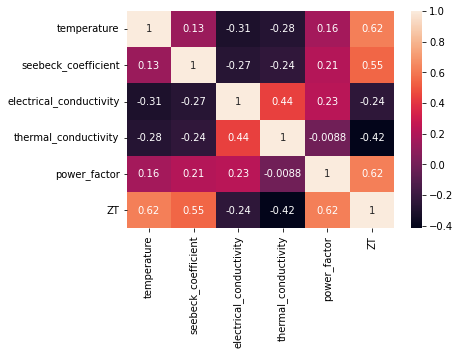

In [8]:
sns.heatmap(df.corr(),annot=True)

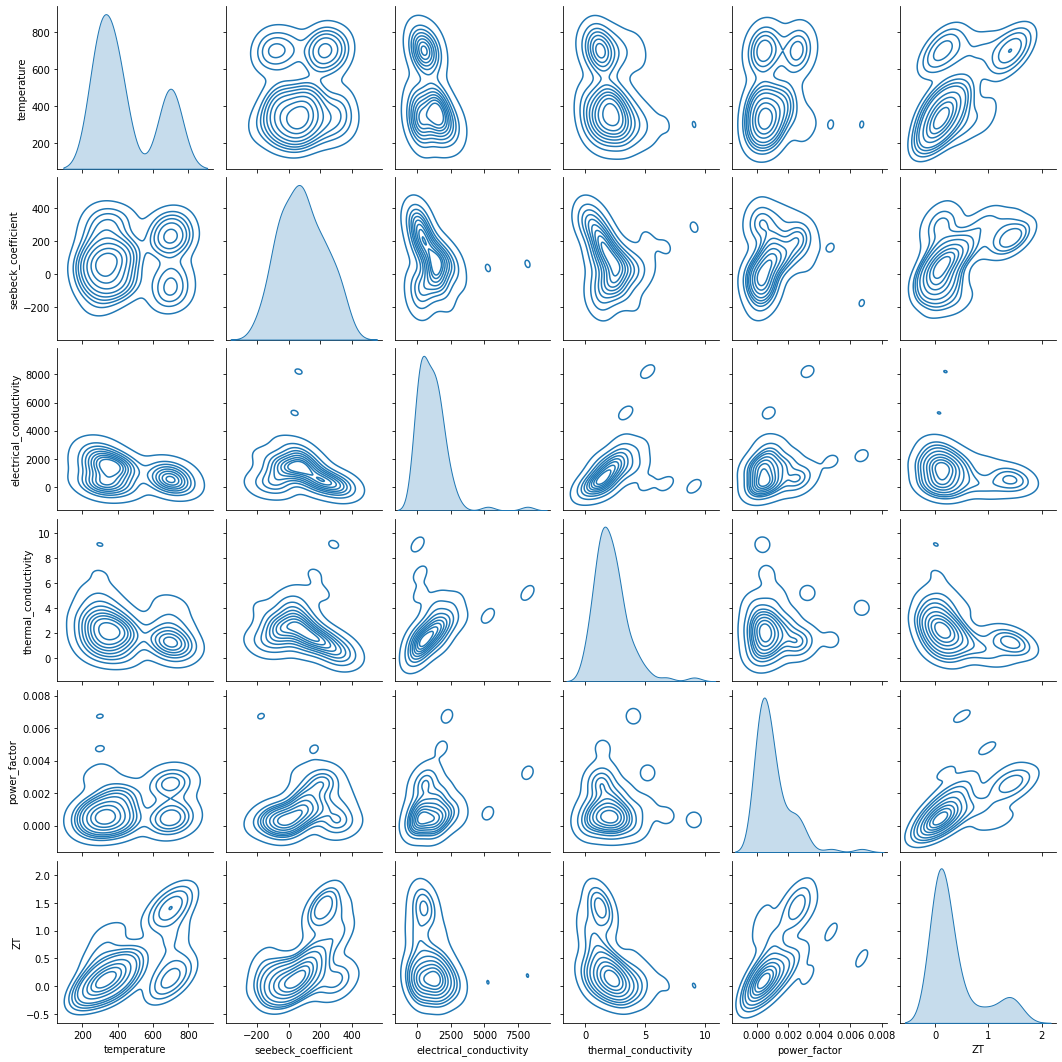

In [9]:
sns.pairplot(df,kind='kde')

<AxesSubplot:xlabel='seebeck_coefficient'>

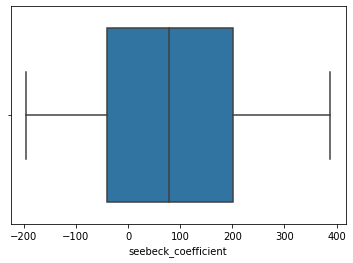

In [10]:
sns.boxplot(df['seebeck_coefficient'])


<AxesSubplot:xlabel='power_factor'>

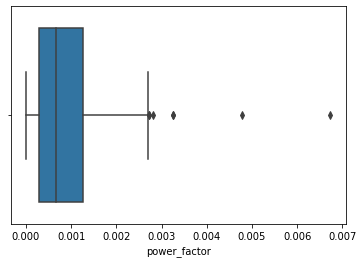

In [11]:
sns.boxplot(df['power_factor'])


<AxesSubplot:xlabel='thermal_conductivity'>

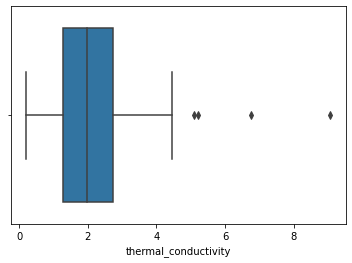

In [12]:
sns.boxplot(df['thermal_conductivity'])


<AxesSubplot:xlabel='electrical_conductivity'>

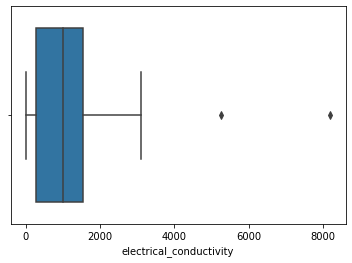

In [13]:
sns.boxplot(df['electrical_conductivity'])


array([[<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'seebeck_coefficient'}>],
       [<AxesSubplot:title={'center':'electrical_conductivity'}>,
        <AxesSubplot:title={'center':'thermal_conductivity'}>],
       [<AxesSubplot:title={'center':'power_factor'}>,
        <AxesSubplot:title={'center':'ZT'}>]], dtype=object)

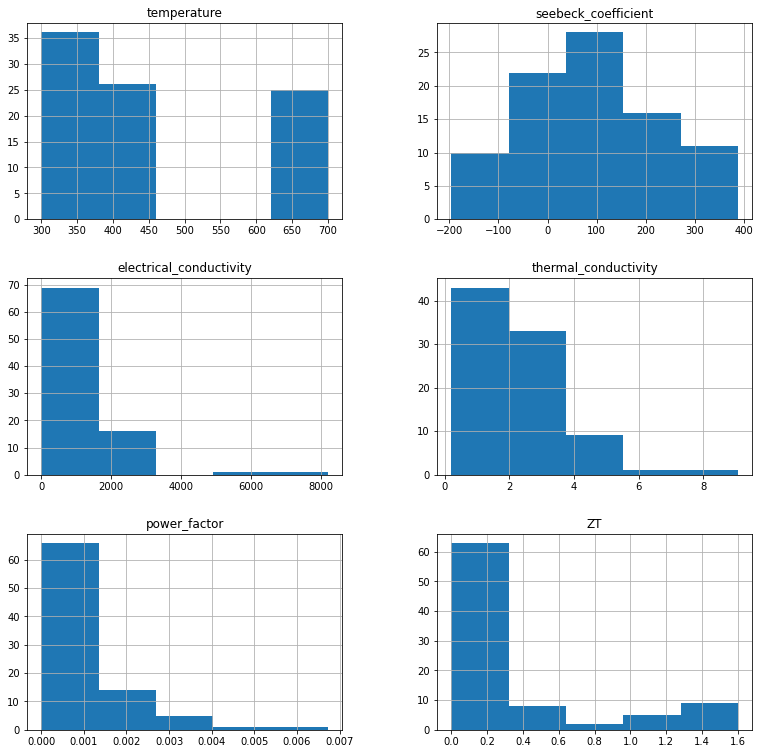

In [14]:
df.hist(bins=5,figsize=(13,13))

# SPLITTING OUR DATA SET INTO INDEPENDANT AND DEPENDANT VARIABLES

In [15]:

x=df.iloc[:,:6].values
y=df.iloc[:,6].values

# LABEL ENCODING FORMULAR COLUMN

In [130]:
le=LabelEncoder()
x[:,0]=le.fit_transform(x[:,0])


# SPLITTING OUR DATA SET INTO TRAINING AND TESTING SET

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)


# APPLYING LINEAR REGRESSION MODEL

In [18]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_acc=r2_score(y_test,lr_pred)
lr_acc

0.8416437541657931

In [19]:
lr_rmse=np.sqrt(mean_squared_error(lr_pred,y_test))
print(lr_rmse)
lr_mae=mean_absolute_error(y_test,lr_pred)
print(lr_mae)


0.2165356545277483
0.1835945188887376


# APPLYING RANDOM FOREST MODEL

In [20]:
rf=RandomForestRegressor(1200)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_acc=r2_score(y_test,rf_pred)
rf_acc

0.8770482420866634

In [21]:
rf_rmse=np.sqrt(mean_squared_error(rf_pred,y_test))
print(rf_rmse)
rf_mae=mean_absolute_error(y_test,rf_pred)
print(rf_mae)

0.19080035991979813
0.10919828681944277


# APPLYING EXTREME GRADIENT BOOSTING MODEL

In [22]:
import xgboost as xgb
xg= xgb.XGBRegressor(max_depth = 5, n_estimators = 1000)
xg.fit(x_train,y_train)
xg_pred=xg.predict(x_test)
xg_acc=r2_score(y_test,xg_pred)
xg_acc

0.9199340845963789

In [23]:
xg_rmse=np.sqrt(mean_squared_error(xg_pred,y_test))
print(xg_rmse)
xg_mae=mean_absolute_error(y_test,xg_pred)
print(xg_mae)

0.15396983878577697
0.09749633003979921


# APPLYING BAGGING REGRESSION MODEL

In [24]:
from sklearn.ensemble import BaggingRegressor
bg= BaggingRegressor(base_estimator=RandomForestRegressor(1200))
bg.fit(x_train,y_train)
bg_pred=bg.predict(x_test)
bg_acc=r2_score(y_test,bg_pred)
bg_acc

0.8647217638984364

In [25]:
bg_rmse=np.sqrt(mean_squared_error(bg_pred,y_test))
print(bg_rmse)
bg_mae=mean_absolute_error(y_test,bg_pred)
print(bg_mae)

0.2001362620930291
0.12349213506944327


# APPLYING GRADIENT BOOSTING MODEL

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred=gbr.predict(x_test)
gbr_acc=r2_score(y_test,gbr_pred)
gbr_acc

0.9449562394345004

In [70]:
gbr_rmse=np.sqrt(mean_squared_error(gbr_pred,y_test))
print(gbr_rmse)
gbr_mae=mean_absolute_error(y_test,gbr_pred)
print(gbr_mae)

0.1276632413465289
0.07291086712110556


# APPLYING OUR MODEL BY USING HYPER PARAMETER FINE TUNING

In [87]:
gbr_p={
 'n_estimators':[ x for x in range(1000,2000,200)],
    'criterion':['friedman_mse','squared_error','mse'], 
    
    
}


grid_gbr=GridSearchCV(GradientBoostingRegressor(),gbr_p,n_jobs=-1,cv=5,verbose=True,pre_dispatch='2 *n_jobs')
grid_gbr.fit(x_train,y_train)
pred_gbr=grid_gbr.predict(x_test)
gbr=r2_score(y_test,pred_gbr)
print('Accuracy of GBM model:',gbr)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy of GBM model: 0.9595702230958864


In [105]:
grid_gbr.best_estimator_

GradientBoostingRegressor(n_estimators=1200)

In [108]:
gbr=GradientBoostingRegressor(n_estimators=1200)
gbr.fit(x_train,y_train)
gbr_pred=gbr.predict(x_test)
gbr_acc=r2_score(y_test,gbr_pred)
gbr_acc

0.9579052485468684

In [109]:
gbr2_rmse=np.sqrt(mean_squared_error(gbr_pred,y_test))
print(gbr2_rmse)
gbr2_mae=mean_absolute_error(y_test,gbr_pred)
print(gbr2_mae)

0.11164153346559831
0.06502865379649657


# TESTING USING NEW DATA INTO OUR MODEL TO SEE IF IT PREDICTS ACCURATELY

In [132]:
p=np.array(['Ag0.15Sb0.15Te1.15Ge0.85',300,79,1440.0,1.499,0.000891])
p=p.reshape((1,-1))
le=LabelEncoder()
p[:,0]=le.fit_transform(p[:,0])
gbr=GradientBoostingRegressor(criterion='squared_error', n_estimators=1800)
gbr.fit(x_train,y_train)
y=gbr.predict(p)
y

array([0.18000001])

In [133]:
p=np.array(['Ag0.15Sb0.15Te1.15Ge0.85',400,122,1180.0,1.531,0.001760])
p=p.reshape((1,-1))
le=LabelEncoder()
p[:,0]=le.fit_transform(p[:,0])
gbr=GradientBoostingRegressor(criterion='squared_error', n_estimators=1800)
gbr.fit(x_train,y_train)
y=gbr.predict(p)
y

array([0.45999998])

# EVALUATION OF OUR MODELS

In [122]:
mae_errors=[lr_mae,rf_mae,xg_mae,bg_mae,gbr_mae,gbr2_mae]
rmse_errors=[lr_rmse,rf_rmse,xg_rmse,bg_rmse,gbr_rmse,gbr2_rmse]

In [123]:
model_list=['LR','RF','XG','BG','GB','our model']

In [124]:
data={'models used':model_list,'MAE':mae_errors,'RMSE':rmse_errors}

In [125]:
frame=pd.DataFrame(data)

In [126]:
frame.tail()

,models used,MAE,RMSE
1,RF,0.109198,0.190800
2,XG,0.097496,0.153970
3,BG,0.123492,0.200136
4,GB,0.072911,0.127663
5,our model,0.065029,0.111642


<AxesSubplot:xlabel='MAE', ylabel='models used'>

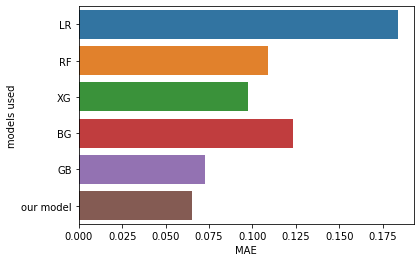

In [127]:
sns.barplot(y=frame['models used'],x=frame['MAE'])

<AxesSubplot:xlabel='RMSE', ylabel='models used'>

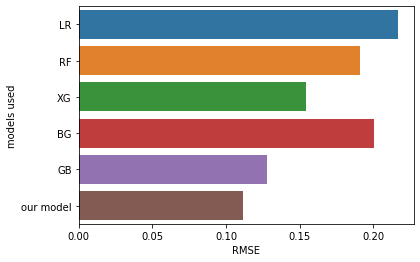

In [128]:
sns.barplot(y=frame['models used'],x=frame['RMSE'])

<AxesSubplot:title={'center':'error display'}>

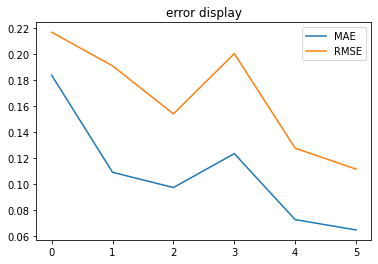

In [129]:
frame.plot(title='error display')